In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings; warnings.simplefilter('ignore')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('donald_trump_new.csv',names=['text','ratingName','headline','named_entities_claim','named_entities_article'])


In [4]:
stopwords = nltk.corpus.stopwords.words('english')

newStopWords = ['says','say','said','an','000','hr','084', '10', '100', '1000', '100th', '102', '109', '11', '110', '12', '120', '127', '13', '14', '141', '15', '16', '168', '17', '170', '18', '19', '1922', '1924', '1928', '1930s', '1933', '1952', '1963', '1964', '1969', '1970s', '1973', '1976', '1981', '1984', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1995', '1996', '1998', '1999', '20', '200', '2000', '2001', '2003', '2005', '2006', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2025', '2040', '21', '22', '23', '24', '244', '25', '250', '2500', '25th', '26', '27', '28', '29', '30', '300', '308', '331', '34', '342', '35', '37', '38', '392', '40', '400', '42', '44', '45', '450', '45th', '46', '47', '48', '49', '495', '4th', '50', '500', '50s', '50th', '52', '550', '56', '57', '600', '603', '612', '62', '620', '63', '65', '650', '66', '67', '6th', '70', '75', '772', '78', '7th', '80', '800', '81', '82nd', '85', '90', '91', '93', '94', '95', '959', '96', '9th','107', '10th', '13th', '150', '1890', '1968', '1985', '1986', '2002', '2009', '2010', '219', '228', '296', '375', '53', '58', '60', '737', '87', '871', '89', '99','103', '124', '125', '131', '176', '1800s', '1900', '1912', '1917', '1920s', '1947', '1954', '1960', '1962', '1965', '1980', '1980s', '1982', '2004', '2007', '2023', '211', '224', '237', '290', '2nd', '33', '36', '378', '405', '43', '59', '696', '700', '71', '722', '73', '74', '805', '850', '86', '92', '98']
stopwords.extend(newStopWords)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [5]:
start_time=time.time()
# remove '\\n'
df['text'] = df['text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
df['text'] = df['text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
df['text'] = df['text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
df['text'] = df['text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))

end_time=time.time()
print("total time",end_time-start_time)

total time 0.053627967834472656


In [6]:
df.ratingName.value_counts()

FALSE         1653
TRUE           370
ratingName       1
Name: ratingName, dtype: int64

In [7]:
df.drop([0], inplace=True)


In [8]:
df.loc[df['ratingName']=='TRUE','ratingName']=1
df.loc[df['ratingName']=='FALSE','ratingName']=0

In [9]:
y = df.ratingName


In [10]:
df.head()

text ratingName  \
1  'Two years ago, the longest serving leader of ...          0   
2  President Donald Trump called Philippines lawm...          0   
3  The Coast Guard started reselling seized cocai...          0   
4  'It appears that the (Jacksonville) shooter wa...          0   
5  Says that President Barack Obama said an attac...          0   

                                            headline  \
1  No, Jerry Brown hasn't declared California a '...   
2  Did President Donald Trump Call Senator Antoni...   
3  Did the Coast Guard Start Reselling Seized Coc...   
4  Rush Limbaugh falsely claims Jacksonville shoo...   
5  Obama called potential attack on Syria a 'pinp...   

                                named_entities_claim  \
1  Calexit,California republic,Donald Trump,Golde...   
2  Donald Trump,Facebook,Manila Standard,Marco Ru...   
3  Blog is,Department of Homeland Security,Donald...   
4  4 People,Anti-Trump ‘Resistance,Donald Trump,G...   
5  2015, radio,Barack Obama,Bashar Assad,Brooking...   

                          named_entities_article  
1                California republic,Jerry Brown  
2  Antonio Trillanes IV,Donald Trump,Philippines  
3                                        cocaine  
4                              Trump 'Resistance  
5                             Barack Obama,Syria

In [11]:
porter = PorterStemmer()
lancaster=LancasterStemmer()


word_list = ["accept", "accepted", "accepting"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))
    
word_list = ["admits", "admitted"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))    
    
    
word_list = ["attack", "attacked", "attacking", "attacks"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))       
    
    

Word                Porter Stemmer      lancaster Stemmer   
accept              accept              acceiv              
accepted            accept              acceiv              
accepting           accept              acceiv              
Word                Porter Stemmer      lancaster Stemmer   
admits              admit               admit               
admitted            admit               admit               
Word                Porter Stemmer      lancaster Stemmer   
attack              attack              attack              
attacked            attack              attack              
attacking           attack              attack              
attacks             attack              attack              


In [12]:
X = df["text"]
y = df["ratingName"]

In [13]:
Y=y.astype('int')

In [14]:
X.shape

(2023,)

In [15]:
Y.shape

(2023,)

In [16]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords, max_df=1.0,min_df=1,smooth_idf=False,ngram_range=(3, 3), sublinear_tf=False, norm=None, analyzer='word')
tfidf_data = tfidf_vectorizer.fit_transform(X)


In [17]:
tfidf_data.shape

(2023, 15399)

In [18]:
print(tfidf_vectorizer.get_feature_names())

['156 comparable smartest', '1950s western tv', '32a airplane commonly', '348 campaign contributions', '3m federal disaster', '458 million run', '51 percent single', 'aaron rodgers holding', 'abc airing charlie', 'abc news august', 'abc news recently', 'abc senior vice', 'abdullah ii murdered', 'abe lincoln ronald', 'abedin ties muslim', 'abele tv ad', 'abigail spanberger got', 'ability set agendas', 'able access abortion', 'able bodied men', 'able choose governors', 'able get tax', 'able stay one', 'abolish second amendment', 'abolish several constitutional', 'abolitionist portrait bill', 'aborted fetus altar', 'abortion actually going', 'abortion allowed cases', 'abortion big deal', 'abortion demand moment', 'abortion extreme mind', 'abortion later stages', 'abortion law baby', 'abortion punish women', 'abortion raise bitcoin', 'abortion taxpayer funding', 'abortions lead women', 'abortions led baby', 'abraham lincoln succeeded', 'abraham lincoln traitor', 'abramovich due specific', 

In [19]:
tfidf_vectorizer.vocabulary_

{'two years ago': 14237,
 'years ago longest': 15318,
 'ago longest serving': 288,
 'longest serving leader': 7558,
 'serving leader california': 11871,
 'leader california republic': 7255,
 'california republic jerry': 1694,
 'republic jerry brown': 11079,
 'jerry brown boldly': 6746,
 'brown boldly declared': 1574,
 'boldly declared china': 1409,
 'declared china california': 3254,
 'china california separate': 2170,
 'california separate nation': 1698,
 'donald trump called': 3717,
 'trump called philippines': 13530,
 'called philippines lawmaker': 1734,
 'philippines lawmaker antonio': 9853,
 'lawmaker antonio trillanes': 7228,
 'antonio trillanes iv': 637,
 'trillanes iv little': 13411,
 'iv little narco': 6680,
 'coast guard started': 2506,
 'guard started reselling': 5666,
 'started reselling seized': 12403,
 'reselling seized cocaine': 11141,
 'seized cocaine raise': 11735,
 'cocaine raise funds': 2512,
 'raise funds government': 10680,
 'funds government shutdown': 5251,
 'gov

In [20]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())
sorted_by_idf = np.argsort(tfidf_vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['photograph donald trump' 'endorsed donald trump'
 'signed executive order']

Features with highest idf:
['funding obama free' 'fund managers actually'
 'zuckerberg personal senator']


# Modeles d'entrainnements



Naive Bayes avec tf-idf (mn_tfidf_clf)


Logistique Regression avec tf-idf (lr_tfidf_clf)


LinearSvc avec tf-idf (svc_tfidf_clf)

SVC avec tf-idf(svc)

In [21]:
#y_test=y_test.astype('int')

In [22]:
mn_tfidf_clf = MultinomialNB(alpha=0.1)
mn_tfidf_clf.classes_ = np.array([-1, 1])
mn_tfidf_clf.fit(tfidf_data,Y)


from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(mn_tfidf_clf, tfidf_data , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scores2)
print("La moyenne des scores est: \n",scores2.mean())

Le tableau des scores :
 [0.21182266 0.2364532  0.24137931 0.24257426 0.23762376 0.22772277
 0.24257426 0.23762376 0.22772277 0.22772277]
La moyenne des scores est: 
 0.23332195288494367


In [23]:
svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.classes_ = np.array([-1, 1])
svc_tfidf_clf.fit(tfidf_data,Y)


from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(svc_tfidf_clf, tfidf_data , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scores3)
print("La moyenne des scores est: \n",scores3.mean())

Le tableau des scores :
 [0.81773399 0.81773399 0.81773399 0.81683168 0.81683168 0.81683168
 0.81683168 0.81683168 0.81683168 0.81683168]
La moyenne des scores est: 
 0.8171023752621569


In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.classes_ = np.array([-1, 1])
lr.fit(tfidf_data,Y)

from sklearn.model_selection import cross_val_score
scores4 = cross_val_score(lr, tfidf_data , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scores4)
print("La moyenne des scores est: \n",scores4.mean())


Le tableau des scores :
 [0.81773399 0.81773399 0.81773399 0.81683168 0.81683168 0.81683168
 0.81683168 0.81683168 0.81683168 0.81683168]
La moyenne des scores est: 
 0.8171023752621569


In [25]:
from sklearn.svm import SVC
svc = SVC()
svc.classes_ = np.array([-1, 1])
svc.fit(tfidf_data,Y)

scores5 = cross_val_score(svc, tfidf_data , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scores5)
print("La moyenne des scores est: \n",scores5.mean())


Le tableau des scores :
 [0.81773399 0.81773399 0.81773399 0.81683168 0.81683168 0.81683168
 0.81683168 0.81683168 0.81683168 0.81683168]
La moyenne des scores est: 
 0.8171023752621569


# Feature Selection

# # Methode SelectKbest avec Chi2

In [26]:
from sklearn.feature_selection import SelectKBest, chi2
mchi_selector = SelectKBest(chi2, k=10)
x_chi=mchi_selector.fit(tfidf_data, Y)
X_mchibest = mchi_selector.fit_transform(tfidf_data, Y)


In [27]:
print('Original number of features:', tfidf_data.shape[1])
print('Reduced number of features:', X_mchibest.shape[1])

Original number of features: 15399
Reduced number of features: 10


[False False False ... False False False]


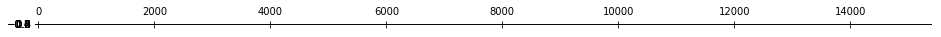

In [28]:
mask=mchi_selector.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),cmap='gray_r')

In [29]:
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [30]:
dfscore=pd.DataFrame(x_chi.scores_)
d = pd.DataFrame(new_features)
fr=pd.concat([d,dfscore],axis=1)
fr.columns=['feature','score']
print(fr[:10])
#print(fr.nlargest(10,'score'))

                   feature      score
0    attorney general jeff   1.927746
1       ellis island medal  38.476197
2    general jeff sessions  38.476197
3     high school students  38.476197
4       hillary clinton co   1.927746
5       island medal honor  38.476197
6         not one question  38.476197
7  presidential debate not   1.927746
8            tax cuts jobs   1.927746
9           trump tax plan   1.927746


In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.classes_ = np.array([-1, 1])
svc.fit(X_mchibest,Y)

scoresFS5 = cross_val_score(svc,X_mchibest  , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scoresFS5)
print("La moyenne des scores est: \n",scoresFS5.mean())


Le tableau des scores :
 [0.81773399 0.82758621 0.83251232 0.82178218 0.82178218 0.82673267
 0.81683168 0.83168317 0.83663366 0.82178218]
La moyenne des scores est: 
 0.8255060235087548


In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.classes_ = np.array([-1, 1])
lr.fit(X_mchibest,Y)

from sklearn.model_selection import cross_val_score
scoresFS4 = cross_val_score(lr, X_mchibest , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scoresFS4)
print("La moyenne des scores est: \n",scoresFS4.mean())

Le tableau des scores :
 [0.81773399 0.82758621 0.83251232 0.81683168 0.82178218 0.82673267
 0.81683168 0.83168317 0.82673267 0.82178218]
La moyenne des scores est: 
 0.8240208749939034


In [33]:
mn_tfidf_clf = MultinomialNB(alpha=0.1)
mn_tfidf_clf.classes_ = np.array([-1, 1])
mn_tfidf_clf.fit(X_mchibest,Y)


from sklearn.model_selection import cross_val_score
scoresFS2 = cross_val_score(mn_tfidf_clf, X_mchibest , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scoresFS2)
print("La moyenne des scores est: \n",scoresFS2.mean())

Le tableau des scores :
 [0.81773399 0.82758621 0.82758621 0.81683168 0.81683168 0.81683168
 0.81683168 0.82673267 0.82673267 0.82178218]
La moyenne des scores est: 
 0.821548066136663


In [34]:
svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.classes_ = np.array([-1, 1])
svc_tfidf_clf.fit(X_mchibest,Y)


from sklearn.model_selection import cross_val_score
scoresFS3 = cross_val_score(svc_tfidf_clf, X_mchibest , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scoresFS3)
print("La moyenne des scores est: \n",scoresFS3.mean())

Le tableau des scores :
 [0.81773399 0.82758621 0.83251232 0.81683168 0.82178218 0.82673267
 0.81683168 0.83168317 0.82673267 0.82178218]
La moyenne des scores est: 
 0.8240208749939034


# Methode SelectKbest avec Mutual_Information 

In [35]:
from sklearn.feature_selection import mutual_info_classif
mif_selector = SelectKBest(mutual_info_classif, k=10)
X_mifbest = mif_selector.fit_transform(tfidf_data, Y)

# Show results
print('Original number of features:', tfidf_data.shape)
print('Reduced number of features:', X_mifbest.shape)

Original number of features: (2023, 15399)
Reduced number of features: (2023, 10)


[False False False ... False False False]


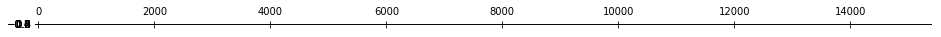

In [36]:
mif=mif_selector.get_support()
print(mif)
plt.matshow(mif.reshape(1,-1),cmap='gray_r')

In [37]:
newmi_features = [] # The list of your K best features

for bool, feature in zip(mif, feature_names):
    if bool:
        newmi_features.append(feature)

In [38]:
d = pd.DataFrame(newmi_features)
fr=pd.concat([d,dfscore],axis=1)
fr.columns=['feature','score']
print(fr[:10])

                   feature      score
0    attorney general jeff   1.927746
1        donald trump used  38.476197
2       ellis island medal  38.476197
3    general jeff sessions  38.476197
4     high school students   1.927746
5       hillary clinton co  38.476197
6       island medal honor  38.476197
7  presidential debate not   1.927746
8            tax cuts jobs   1.927746
9           trump tax plan   1.927746


In [39]:
print(newmi_features)

['attorney general jeff', 'donald trump used', 'ellis island medal', 'general jeff sessions', 'high school students', 'hillary clinton co', 'island medal honor', 'presidential debate not', 'tax cuts jobs', 'trump tax plan']


In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.classes_ = np.array([-1, 1])
svc.fit(X_mifbest,Y)

scoresFSS5 = cross_val_score(svc,X_mifbest  , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scoresFSS5)
print("La moyenne des scores est: \n",scoresFSS5.mean())

Le tableau des scores :
 [0.81773399 0.82758621 0.83251232 0.81683168 0.82178218 0.83168317
 0.81683168 0.83168317 0.83663366 0.82673267]
La moyenne des scores est: 
 0.8260010730137053


In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.classes_ = np.array([-1, 1])
lr.fit(X_mifbest,Y)

from sklearn.model_selection import cross_val_score
scoresFSS4 = cross_val_score(lr, X_mifbest , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scoresFSS4)
print("La moyenne des scores est: \n",scoresFSS4.mean())

Le tableau des scores :
 [0.81773399 0.82758621 0.83251232 0.81683168 0.82178218 0.83168317
 0.81683168 0.83168317 0.82673267 0.82673267]
La moyenne des scores est: 
 0.8250109740038043


In [42]:
mn_tfidf_clf = MultinomialNB(alpha=0.1)
mn_tfidf_clf.classes_ = np.array([-1, 1])
mn_tfidf_clf.fit(X_mifbest,Y)


from sklearn.model_selection import cross_val_score
scoresFSS2 = cross_val_score(mn_tfidf_clf, X_mifbest , Y, cv=10, scoring='accuracy')
print("Le tableau des scores :\n",scoresFSS2)
print("La moyenne des scores est: \n",scoresFSS2.mean())



Le tableau des scores :
 [0.81773399 0.82758621 0.82758621 0.81683168 0.81683168 0.81683168
 0.81683168 0.82673267 0.82673267 0.82673267]
La moyenne des scores est: 
 0.8220431156416135


In [43]:
svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.classes_ = np.array([-1, 1])
svc_tfidf_clf.fit(X_mifbest,Y)


from sklearn.model_selection import cross_val_score
scoresFSS3 = cross_val_score(svc_tfidf_clf, X_mifbest , Y, cv=10, scoring='accuracy')
#metrics.accuracy_score(Y,scoresFSS3 )
print("Le tableau des scores :\n",scoresFSS3)
print("La moyenne des scores est: \n",scoresFSS3.mean())

Le tableau des scores :
 [0.81773399 0.82758621 0.83251232 0.81683168 0.82178218 0.83168317
 0.81683168 0.83168317 0.82673267 0.82673267]
La moyenne des scores est: 
 0.8250109740038043


In [44]:
print('The score of Naive Bayes on all features: {}'.format(scores2.mean()))
print('The score of Naive Bayes on the selected features (Chi2) : {}'.format(scoresFS2.mean()))
print('The score of Naive Bayes on the selected features (Mutual Information) : {}'.format(scoresFSS2.mean()))

The score of Naive Bayes on all features: 0.23332195288494367
The score of Naive Bayes on the selected features (Chi2) : 0.821548066136663
The score of Naive Bayes on the selected features (Mutual Information) : 0.8220431156416135


In [45]:
print('The score of LinearSVC on all features: {}'.format(scores3.mean()))
print('The score of LinearSVC on the selected features: {}'.format(scoresFS3.mean()))
print('The score of LinearSVC on the selected features: {}'.format(scoresFSS3.mean()))

The score of LinearSVC on all features: 0.8171023752621569
The score of LinearSVC on the selected features: 0.8240208749939034
The score of LinearSVC on the selected features: 0.8250109740038043


In [46]:
print('The score of Logistic Regression on all features: {}'.format(scores4.mean()))
print('The score of Logistic Regression on the selected features: {}'.format(scoresFS4.mean()))
print('The score of Logistic Regression on the selected features: {}'.format(scoresFSS4.mean()))

The score of Logistic Regression on all features: 0.8171023752621569
The score of Logistic Regression on the selected features: 0.8240208749939034
The score of Logistic Regression on the selected features: 0.8250109740038043


In [47]:
print('The score of SVC on all features: {}'.format(scores5.mean()))
print('The score of SVC on the selected features: {}'.format(scoresFS5.mean()))
print('The score of SVC on the selected features: {}'.format(scoresFSS5.mean()))

The score of SVC on all features: 0.8171023752621569
The score of SVC on the selected features: 0.8255060235087548
The score of SVC on the selected features: 0.8260010730137053


#  most_informative_feature 


 Identifie les caractéristiques les plus importantes si on utilise un vectoriseur et un classificateur binaire. Mettre n au nombre des caractéristiques pondérées qu'on souhaite afficher. 
    

In [48]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):


    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    return {class_labels[0]: topn_class1,
            class_labels[1]: topn_class2
    }


most_informative_feature_for_binary_classification(tfidf_vectorizer, mn_tfidf_clf, n=10)

{0: [(-2.451423638661398, '1950s western tv'),
  (-2.451423638661398, '32a airplane commonly'),
  (-2.451423638661398, '3m federal disaster'),
  (-2.451423638661398, '458 million run'),
  (-2.451423638661398, '51 percent single'),
  (-2.451423638661398, 'aaron rodgers holding'),
  (-2.451423638661398, 'abc airing charlie'),
  (-2.1003835411951486, '156 comparable smartest'),
  (-2.1003835411951486, '348 campaign contributions'),
  (-1.8839714831072678, 'abc news august')],
 1: [(-2.451423638661398, '1950s western tv'),
  (-2.451423638661398, '32a airplane commonly'),
  (-2.451423638661398, '3m federal disaster'),
  (-2.451423638661398, '458 million run'),
  (-2.451423638661398, '51 percent single'),
  (-2.451423638661398, 'aaron rodgers holding'),
  (-2.451423638661398, 'abc airing charlie'),
  (-2.1003835411951486, '156 comparable smartest'),
  (-2.1003835411951486, '348 campaign contributions'),
  (-1.8839714831072678, 'abc news august')]}

In [49]:
classifiers = [(mn_tfidf_clf, tfidf_vectorizer),
            
               (svc_tfidf_clf, tfidf_vectorizer),
               (lr, tfidf_vectorizer)
               ]

In [50]:
results = {}
for clf, vct in classifiers:
    results[clf] = most_informative_feature_for_binary_classification(vct, clf, n=10)

In [51]:
results

{MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True): {0: [(-2.451423638661398,
    '1950s western tv'),
   (-2.451423638661398, '32a airplane commonly'),
   (-2.451423638661398, '3m federal disaster'),
   (-2.451423638661398, '458 million run'),
   (-2.451423638661398, '51 percent single'),
   (-2.451423638661398, 'aaron rodgers holding'),
   (-2.451423638661398, 'abc airing charlie'),
   (-2.1003835411951486, '156 comparable smartest'),
   (-2.1003835411951486, '348 campaign contributions'),
   (-1.8839714831072678, 'abc news august')],
  1: [(-2.451423638661398, '1950s western tv'),
   (-2.451423638661398, '32a airplane commonly'),
   (-2.451423638661398, '3m federal disaster'),
   (-2.451423638661398, '458 million run'),
   (-2.451423638661398, '51 percent single'),
   (-2.451423638661398, 'aaron rodgers holding'),
   (-2.451423638661398, 'abc airing charlie'),
   (-2.1003835411951486, '156 comparable smartest'),
   (-2.1003835411951486, '348 campaign contributions'),
   (-1

In [52]:
comparable_results = {1: {}, 0: {}}
for clf, data in results.items():
    clf_name = clf.__class__.__name__
    for label, features in data.items():
        for rank, score_tuple in enumerate(features):
            if score_tuple[1] in comparable_results[label]:
                comparable_results[label][score_tuple[1]].append((rank + 1, clf_name))
            else:
                comparable_results[label][score_tuple[1]] = [(rank + 1, clf_name)]

In [53]:
comparable_results[1]

{'1950s western tv': [(1, 'MultinomialNB'),
  (6, 'LinearSVC'),
  (6, 'LogisticRegression')],
 '32a airplane commonly': [(2, 'MultinomialNB'),
  (1, 'LinearSVC'),
  (1, 'LogisticRegression')],
 '3m federal disaster': [(3, 'MultinomialNB'),
  (9, 'LinearSVC'),
  (7, 'LogisticRegression')],
 '458 million run': [(4, 'MultinomialNB'),
  (7, 'LinearSVC'),
  (8, 'LogisticRegression')],
 '51 percent single': [(5, 'MultinomialNB'),
  (2, 'LinearSVC'),
  (2, 'LogisticRegression')],
 'aaron rodgers holding': [(6, 'MultinomialNB'),
  (8, 'LinearSVC'),
  (9, 'LogisticRegression')],
 'abc airing charlie': [(7, 'MultinomialNB'),
  (10, 'LinearSVC'),
  (10, 'LogisticRegression')],
 '156 comparable smartest': [(8, 'MultinomialNB'),
  (3, 'LinearSVC'),
  (3, 'LogisticRegression')],
 '348 campaign contributions': [(9, 'MultinomialNB'),
  (4, 'LinearSVC'),
  (4, 'LogisticRegression')],
 'abc news august': [(10, 'MultinomialNB'),
  (5, 'LinearSVC'),
  (5, 'LogisticRegression')]}

In [54]:
agg_results = {}
for label, features in comparable_results.items():
    for feature, ranks in features.items():
        if feature in agg_results:
            print("WARNING! DUPLICATE LABEL!!! {}".format(feature))
        agg_results[feature] = {
            'label': label,
            'rang': np.mean([r[0] for r in ranks]),
            'count': len(ranks)
        }

WARNING! DUPLICATE LABEL!!! 1950s western tv
WARNING! DUPLICATE LABEL!!! 32a airplane commonly
WARNING! DUPLICATE LABEL!!! 3m federal disaster
WARNING! DUPLICATE LABEL!!! 458 million run
WARNING! DUPLICATE LABEL!!! 51 percent single
WARNING! DUPLICATE LABEL!!! aaron rodgers holding
WARNING! DUPLICATE LABEL!!! abc airing charlie
WARNING! DUPLICATE LABEL!!! 156 comparable smartest
WARNING! DUPLICATE LABEL!!! 348 campaign contributions
WARNING! DUPLICATE LABEL!!! abc news august


In [55]:
comparison_df = pd.DataFrame(agg_results).T

In [56]:
comparison_df.head()

count  label      rang
1950s western tv         3.0    0.0  4.333333
32a airplane commonly    3.0    0.0  1.333333
3m federal disaster      3.0    0.0  6.333333
458 million run          3.0    0.0  6.333333
51 percent single        3.0    0.0  3.000000

Voyons mes 10 principaux jetons pour les nouvelles et les fausses nouvelles, classés en fonction du nombre de classificateurs qui les ont utilisées comme caractéristique principale.

In [57]:
comparison_df[comparison_df['label'] == 1].sort_values('count', ascending=0).head(20)

Empty DataFrame
Columns: [count, label, rang]
Index: []

In [58]:
comparison_df[comparison_df['label'] == 0].sort_values('count', ascending=0).head(20)


count  label      rang
1950s western tv              3.0    0.0  4.333333
32a airplane commonly         3.0    0.0  1.333333
3m federal disaster           3.0    0.0  6.333333
458 million run               3.0    0.0  6.333333
51 percent single             3.0    0.0  3.000000
aaron rodgers holding         3.0    0.0  7.666667
abc airing charlie            3.0    0.0  9.000000
156 comparable smartest       3.0    0.0  4.666667
348 campaign contributions    3.0    0.0  5.666667
abc news august               3.0    0.0  6.666667

# Conclusion : Vectoriseurs

Conclusion
Comme on pouvait s'y attendre, les vecteurs de mots et les vecteurs TF-IDF n'ont pas beaucoup contribué à déterminer des caractéristiques significatives permettant de classer des informations fausses ou réelles, ce problème est beaucoup plus complexe que la simple classification de texte.
 À savoir que les modèles linéaires gèrent le bruit dans ce cas mieux que le classifieur multinomial Naive Bayes. 

Une fois qu'on a réalisé que les classificateurs Naive Bayes avaient identifié de nombreux jetons bruyants dans l'ordre alphabétique comme étant les meilleurs classificateurs de fake news, j'ai décidé de voir exactement combien de "principales caractéristiques" avaient ce modèle.

In [59]:
feature_names = tfidf_vectorizer.get_feature_names()
for idx, ftr_weight in enumerate(sorted(zip(mn_tfidf_clf.coef_[0], feature_names))):
    if ftr_weight[0] <= -16.067750538483136:
        continue
    print(idx, ftr_weight)
    break

0 (-2.451423638661398, '1950s western tv')
